In [1]:
import xarray as xr
import pyet
import numpy as np

import os
import glob

In [2]:
import pandas as pd

In [37]:
import matplotlib.pyplot as plt

In [3]:
diri='/scratch/nklm/Px_flashdroughts/PET_data/'

In [34]:
tmean =xr.open_dataset(f'{diri}/tas_Rhine.nc/',engine='netcdf4')["tas"].to_dataframe()
tmin  =xr.open_dataset(f'{diri}/tasmin_Rhine.nc',engine='netcdf4')["tasmin"].to_dataframe()
tmax  =xr.open_dataset(f'{diri}/tasmax_Rhine.nc',engine='netcdf4')["tasmax"].to_dataframe()
wind  =xr.open_dataset(f'{diri}/sfcWind_Rhine.nc',engine='netcdf4')["sfcWind"].to_dataframe()
rh    =xr.open_dataset(f'{diri}/hurs_Rhine.nc',engine='netcdf4')["hurs"].to_dataframe()
rs    =xr.open_dataset(f'{diri}/rsds_Rhine.nc',engine='netcdf4')["rsds"].to_dataframe() 
tmin = tmin - 273.15
tmax = tmax - 273.15
rs = rs * (86400 / 1000000)  # concert to [MJ/m2 day] 
elevation    = 477.
lat          = 50 * np.pi / 180 

In [33]:
tmax

,tasmax
time,
2020-01-01 11:00:00,272.616457
2020-01-02 11:00:00,272.972002
2020-01-03 11:00:00,276.962737
2020-01-04 11:00:00,276.192567
2020-01-05 11:00:00,275.448171
...,...
2022-12-27 11:00:00,276.442846
2022-12-28 11:00:00,278.321313
2022-12-29 11:00:00,280.709361


In [3]:
3*365*24/3

8760.0

In [35]:
pet_pm_asce = pyet.pm_asce(tmean['tas'], wind["sfcWind"], rs=rs["rsds"], elevation=elevation, lat=lat, tmax=tmax["tasmax"], tmin=tmin["tasmin"], rh=rh['hurs'])

# pet_pm_asce = pyet.pm_asce(tmean, wind, rs=rs, elevation=elevation, lat=lat, tmax=tmax, tmin=tmin, rh=rh['hurs'])

(1095,)
(1095,)
(1095,)
(1095,)
()
()
(1095,)
()
()
()
()
()
(1095,)
()
(1095,)


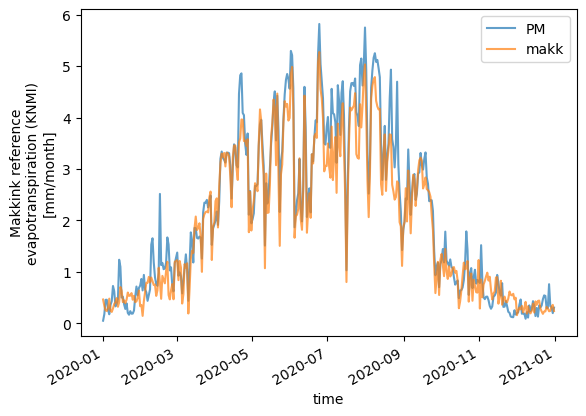

In [43]:
pet_pm_asce[0:365].plot(label='PM', alpha=0.7)
pet_mk[0:365].plot(label='makk', alpha=0.7)
# pet_era[0:365].plot(label='ERA', alpha=0.7)
plt.legend()

In [ ]:
pet_pm_asce.plot(label='PM')
pet_mk.plot(label='makk')
pet_era.plot(label='ERA')
plt.legend()

In [16]:
pet_mk = xr.open_dataset('/scratch/nkkw/Karin/P2_flashdroughts/meteodata_ERA5/makk_Rhine.nc')['makk'].sel(time=slice('01-01-2020','31-12-2022'))

/perm/nklm/mambaforge/lib/python3.10/site-packages/xarray/core/indexes.py:207: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  indexer = index.slice_indexer(


In [20]:
pet_era = xr.open_dataset('/scratch/nkkw/Karin/P2_flashdroughts/meteodata_ERA5/pet_Rhine.nc')['pet'].sel(time=slice('01-01-2020','31-12-2022'))

/perm/nklm/mambaforge/lib/python3.10/site-packages/xarray/core/indexes.py:207: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  indexer = index.slice_indexer(


In [15]:
pet_mk['makk']

<xarray.DataArray 'makk' (time: 1095)>
[1095 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T11:00:00 ... 2022-12-31T11:00:00
Attributes:
    long_name:      Makkink reference evapotranspiration (KNMI)
    standard_name:  ref_evapotranspiration
    units:          mm/month

<AxesSubplot: xlabel='time'>

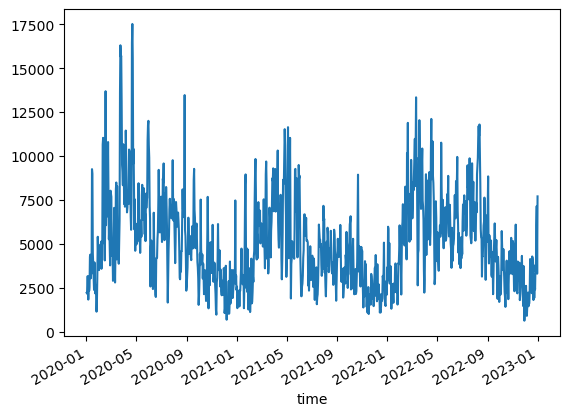

In [19]:
pet_pm_asce.plot()


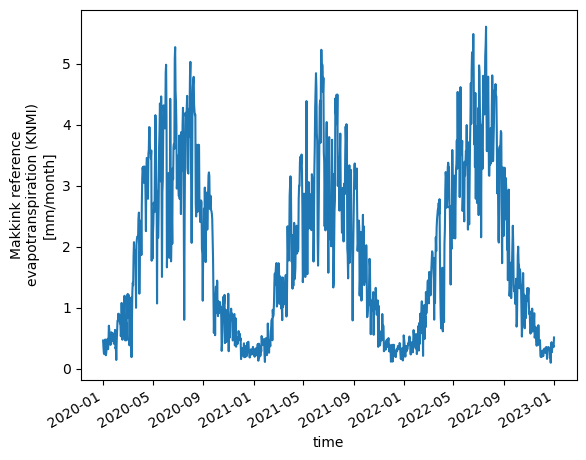

In [18]:
pet_mk.plot()

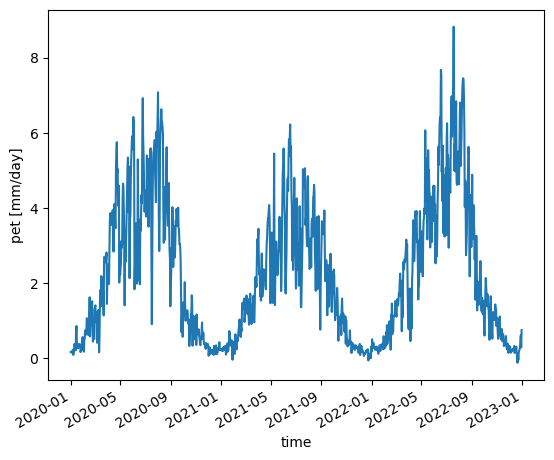

In [21]:
pet_era.plot()

In [20]:
df_tmean = tmean.to_dataframe()

In [11]:
rh.data

AttributeError: 'DataFrame' object has no attribute 'data'

<AxesSubplot: xlabel='time'>

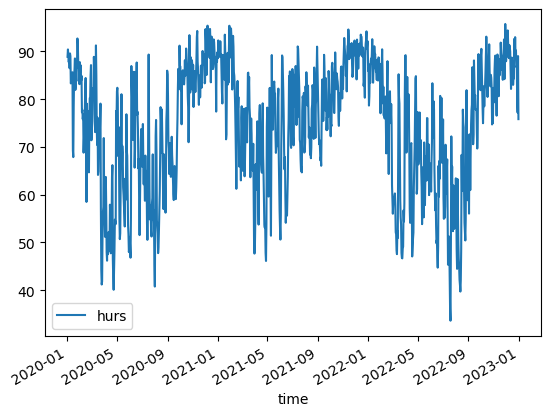

In [26]:
rh.plot()


		ERA5				Makkink
time		ET	PET	ESI		PET	ESI
1-1		0.1369	0.1624	 0.84		0.464	0.29
2-1		0.1142	0.1508	 0.76		0.3387	0.34
3-1		0.194	0.1529	 1.27		0.2523	0.77
4-1		0.345	0.1619	 2.13		0.2399	1.44
12-12		0.1926	0.102	 1.89		0.195	0.99
13-12		0.2044	0.0956	 2.14		0.2438	0.84
14-12		0.4846	0.3269	 1.48		0.3832	1.26



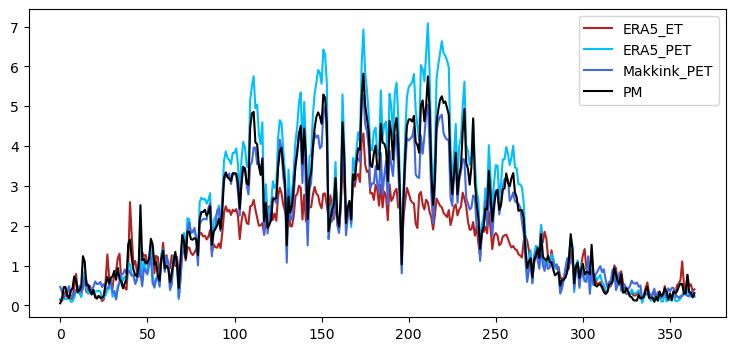

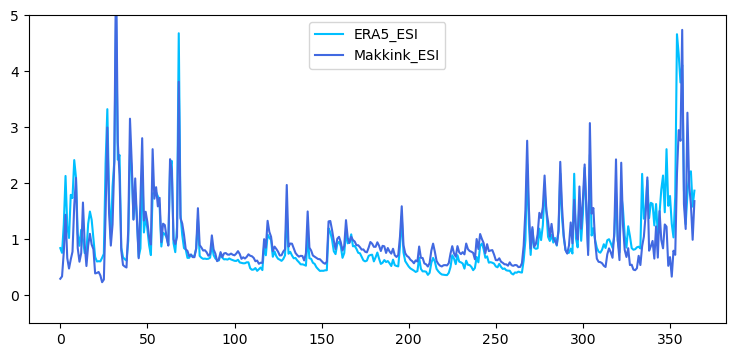

In [54]:

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


def Makkink_KNMI(T, Q):
    """Compute Makkink reference evapotranspiration (KNMI internal formula)
    Courtesy: Emma Daniels"""
    #1) verzadigde dampspanning tov water
    e_s = 6.107 * 10**(7.5 * (T / (237.3 + T)))   #[hPa]
    #2) verzadigde dampspanningsgradient tov water
    delta = ((7.5 * 237.3) /  (T + 237.3)**2) * np.log(10) * e_s   #[hPa/degC]
    #3) psychrometerconstante (afhankelijk van T)
    gamma = 0.646 + (0.0006 * T)   #[hPa/degC]
    #4) verdampingswarmte van water
    labda = 1000 * (2501 - (2.375 * T))   #[J/kg]
    #5) soortelijke massa van water
    rho = 1000   #[kg/m3]
    #verdamping
    month_length = T.time.dt.days_in_month
    #Ev = ( (1000 * 0.65 * delta) / ((delta + gamma) * rho * labda) ) * (Q * (60 * 60 * 24 * month_length))   #[mm/month]
    Ev = ( (1000 * 0.65 * delta) / ((delta + gamma) * rho * labda) ) * (Q * (60 * 60 * 24 ))   #[mm/day?]
    # Karin: add attributes
    Ev.name = 'pet'
    Ev.attrs['long_name'] = 'Makkink reference evapotranspiration (KNMI)'
    Ev.attrs['standard_name'] = 'ref_evapotranspiration'
    Ev.attrs['units'] = 'mm/month'
    return Ev







datadir = '/perm/nkkw/P2_flashdroughts/link_project/meteodata_ERA5/'


"""
da_tas = xr.open_dataset(f"{datadir}tas_Rhine.nc").tas
da_rsds = xr.open_dataset(f"{datadir}rsds_Rhine.nc").rsds
da_makk = Makkink_KNMI(da_tas,da_rsds)
da_makk.name = 'makk'
ds_out = da_makk.to_dataset()
ds_out.to_netcdf(f"{datadir}makk_Rhine.nc")

da_tas = xr.open_dataset(f"{datadir}tas_Rhine_detrend.nc").tas
da_rsds = xr.open_dataset(f"{datadir}rsds_Rhine_detrend.nc").rsds
da_makk = Makkink_KNMI(da_tas,da_rsds)
da_makk.name = 'makk'
da_makk.attrs['detrend'] = 'computed using detrended TAS and RSDS'
ds_out = da_makk.to_dataset()
ds_out.to_netcdf(f"{datadir}makk_Rhine_detrend.nc")

import pdb; pdb.set_trace()
"""



da_et = xr.open_dataset(f"{datadir}et_Rhine.nc").et
da_pet = xr.open_dataset(f"{datadir}pet_Rhine.nc").pet
da_makk = xr.open_dataset(f"{datadir}makk_Rhine.nc").makk


year = 2020
da_et = da_et.sel(time=slice(f"{year}-01-01",f"{year}-12-31"))
da_pet = da_pet.sel(time=slice(f"{year}-01-01",f"{year}-12-31"))
da_makk = da_makk.sel(time=slice(f"{year}-01-01",f"{year}-12-31"))

da_esi = da_et/da_pet
da_esi_makk = da_et / da_makk

print()
print("\t\tERA5\t\t\t\tMakkink")
print("time\t\tET\tPET\tESI\t\tPET\tESI")
for i in [0,1,2,3,345,346,347]:
  print(f"{da_et.time[i].dt.day.values}-{da_et.time[i].dt.month.values}\t\t{np.round(da_et[i].values,4)}\t{np.round(da_pet[i].values,4)}\t {np.round(da_esi[i].values,2)}\t\t{np.round(da_makk[i].values,4)}\t{np.round(da_esi_makk[i].values,2)}")
print()

fig = plt.figure(figsize=(9,4))
plt.plot(da_et,color='firebrick',label='ERA5_ET')
plt.plot(da_pet,color='deepskyblue',label='ERA5_PET')
plt.plot(da_makk,color='royalblue',label='Makkink_PET')
plt.plot(pet_pm_asce[0:365].values,color='k',label='PM')
plt.legend()

fig = plt.figure(figsize=(9,4))
plt.plot(da_esi,color='deepskyblue',label='ERA5_ESI')
plt.plot(da_esi_makk,color='royalblue',label='Makkink_ESI')
plt.ylim(-.5,5)
plt.legend()

plt.show()





In [47]:
da_et

<xarray.DataArray 'et' (time: 365)>
array([0.136853, 0.114211, 0.194041, ..., 0.52751 , 0.356389, 0.403173])
Coordinates:
  * time     (time) datetime64[ns] 2020-01-01T11:00:00 ... 2020-12-31T11:00:00
Attributes:
    units:          mm/day
    area:           Rhine-mean
    ERA5_variable:  e

In [52]:
pet_pm_asce.values

array([0.05184028, 0.17924668, 0.45701535, ..., 1.03868809, 0.47340926,
       1.35237737])